# Modelo de prediccion

## Transformacion de datos

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import category_encoders as ce
import scipy.stats as stats
import pylab
from sklearn import preprocessing


In [41]:
def vNormalTest(df,feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sn.kdeplot(df[feature])
    plt.subplot(1,2,2)
    stats.probplot(df[feature],plot=pylab)
    plt.show()

In [42]:
g_df = pd.read_pickle("./employee_df.pkl")

Que tipo de variables categoricas hay y cuales son sus valores?


In [43]:
g_df.drop('EmployeeID', inplace=True, axis=1)

In [44]:
g_df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [45]:
encoder=ce.OneHotEncoder(cols='BusinessTravel',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(g_df)
g_df=data_encoded

C:\ProgramData\Anaconda3\envs\miniconda3_base1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [46]:
g_df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [47]:
encoder=ce.OneHotEncoder(cols='Department',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(g_df)
g_df=data_encoded

C:\ProgramData\Anaconda3\envs\miniconda3_base1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [48]:
g_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [49]:
encoder=ce.BinaryEncoder(cols=['EducationField'],return_df=True)
data_encoded = encoder.fit_transform(g_df)
g_df=data_encoded

C:\ProgramData\Anaconda3\envs\miniconda3_base1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [50]:
g_df.JobRole.unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [51]:
encoder=ce.BinaryEncoder(cols=['JobRole'],return_df=True)
data_encoded = encoder.fit_transform(g_df)
g_df=data_encoded

C:\ProgramData\Anaconda3\envs\miniconda3_base1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [52]:
g_df.MaritalStatus.unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [53]:
encoder=ce.OneHotEncoder(cols='MaritalStatus',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(g_df)
g_df=data_encoded

C:\ProgramData\Anaconda3\envs\miniconda3_base1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [54]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   BusinessTravel_Travel_Frequently   4410 non-null   float64
 4   BusinessTravel_Non-Travel          4410 non-null   float64
 5   Department_Sales                   4410 non-null   float64
 6   Department_Research & Development  4410 non-null   float64
 7   Department_Human Resources         4410 non-null   float64
 8   DistanceFromHome                   4410 non-null   int64  
 9   Education                          4410 non-null   int64  
 10  EducationField_0                   4410 non-null   int64  
 11  EducationField_1                   4410 non-null   int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel_Travel_Rarely'}>,
        <AxesSubplot:title={'center':'BusinessTravel_Travel_Frequently'}>,
        <AxesSubplot:title={'center':'BusinessTravel_Non-Travel'}>,
        <AxesSubplot:title={'center':'Department_Sales'}>],
       [<AxesSubplot:title={'center':'Department_Research & Development'}>,
        <AxesSubplot:title={'center':'Department_Human Resources'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField_0'}>,
        <AxesSubplot:title={'center':'EducationField_1'}>],
       [<AxesSubplot:title={'center':'EducationField_2'}>,
        <AxesSubplot:title={'center':'EducationField_3'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole_0'}>,
        <AxesSubplot:title={'cen

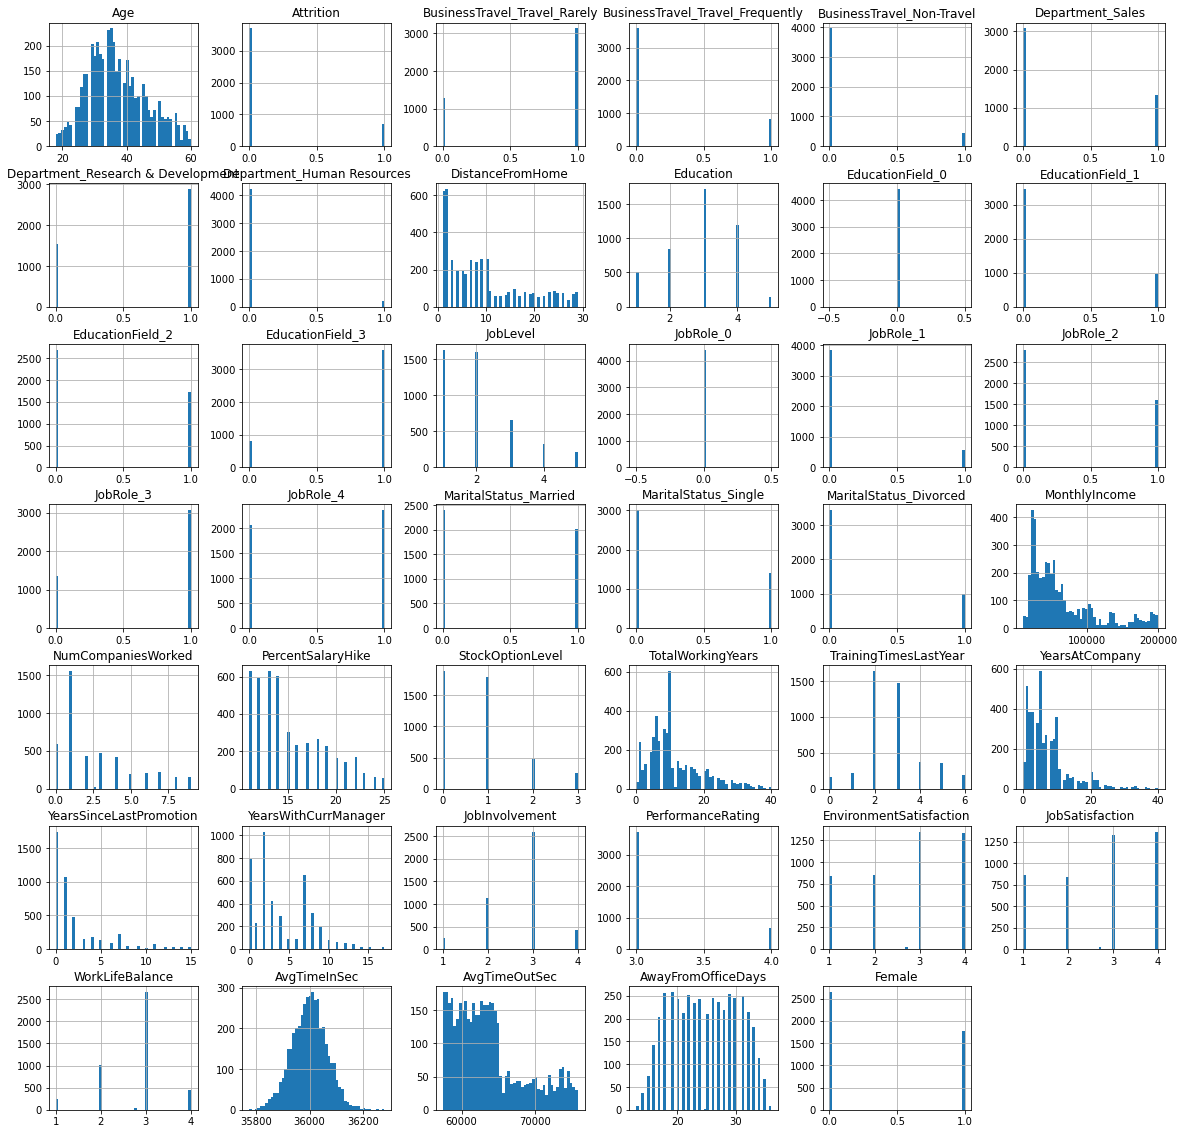

In [55]:
g_df.hist(bins=50, figsize=(20,20))

In [56]:
df = g_df

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   BusinessTravel_Travel_Frequently   4410 non-null   float64
 4   BusinessTravel_Non-Travel          4410 non-null   float64
 5   Department_Sales                   4410 non-null   float64
 6   Department_Research & Development  4410 non-null   float64
 7   Department_Human Resources         4410 non-null   float64
 8   DistanceFromHome                   4410 non-null   int64  
 9   Education                          4410 non-null   int64  
 10  EducationField_0                   4410 non-null   int64  
 11  EducationField_1                   4410 non-null   int64

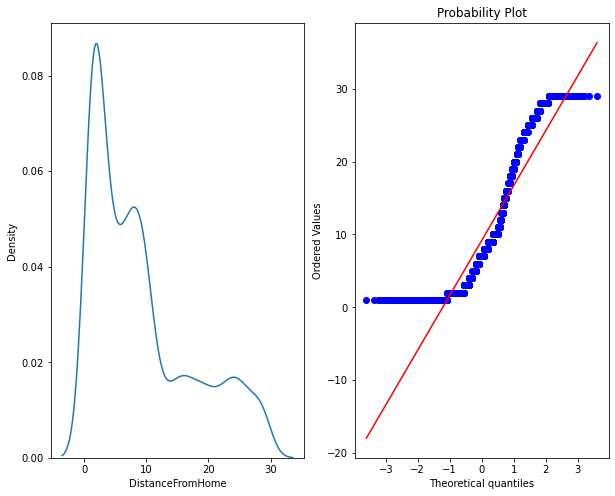

In [58]:
vNormalTest(df,'DistanceFromHome')

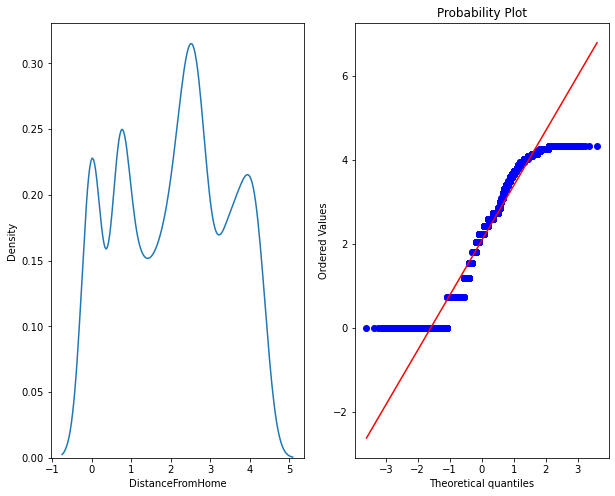

In [59]:
df['DistanceFromHome'],parameters=stats.boxcox(df['DistanceFromHome'])
vNormalTest(df,'DistanceFromHome')

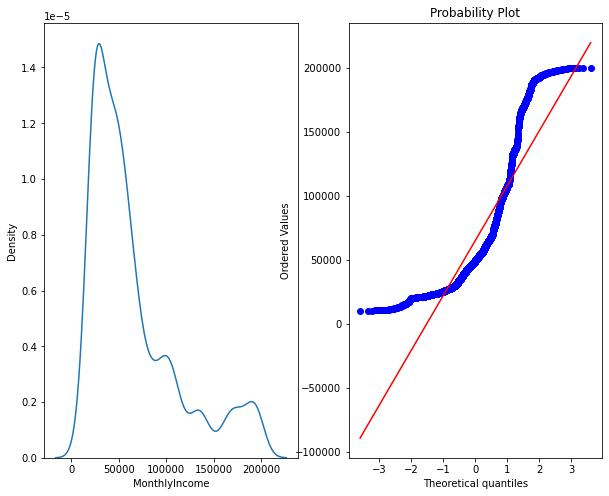

In [60]:
vNormalTest(df,'MonthlyIncome')

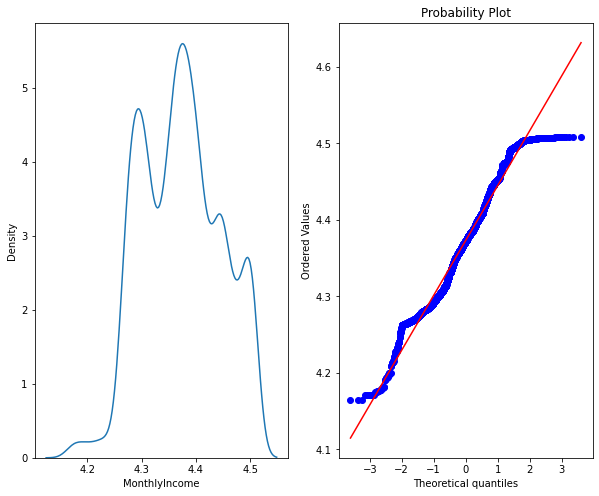

In [61]:
#df['MonthlyIncome1'] = np.log10(df['MonthlyIncome'])
df['MonthlyIncome'],parameters=stats.boxcox(df['MonthlyIncome'])
vNormalTest(df,'MonthlyIncome')

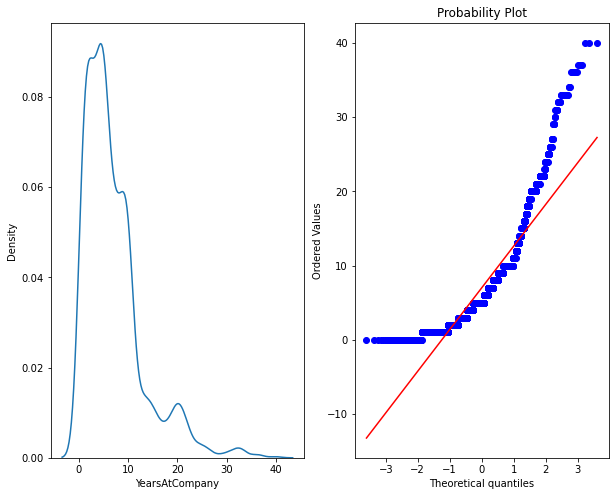

In [62]:
vNormalTest(df,'YearsAtCompany')

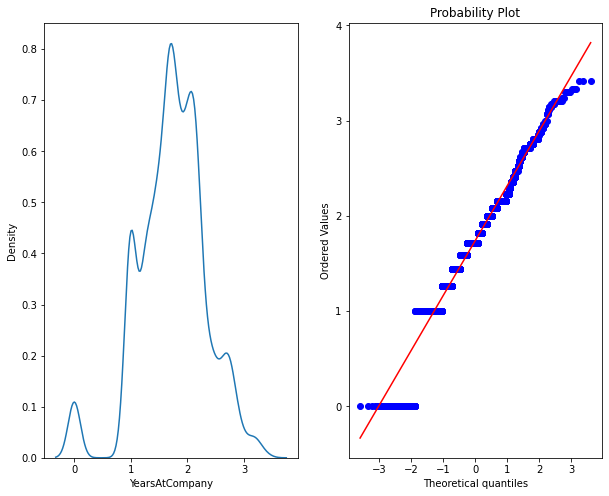

In [63]:
df['YearsAtCompany'] = np.cbrt(df['YearsAtCompany'])
#df['YearsAtCompany1'],parameters=stats.boxcox(df['YearsAtCompany'])
vNormalTest(df,'YearsAtCompany')

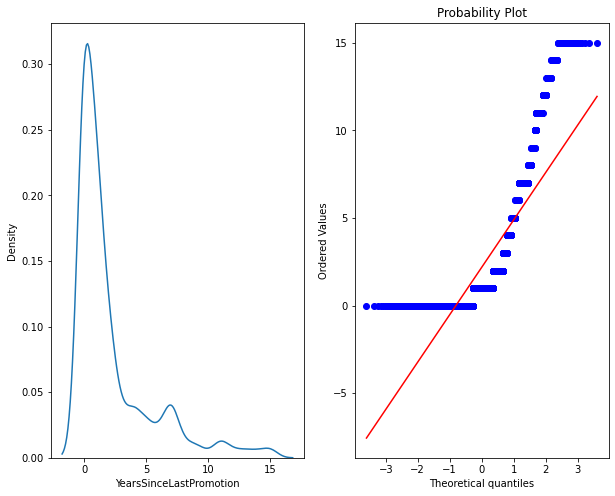

In [64]:
vNormalTest(df,'YearsSinceLastPromotion')

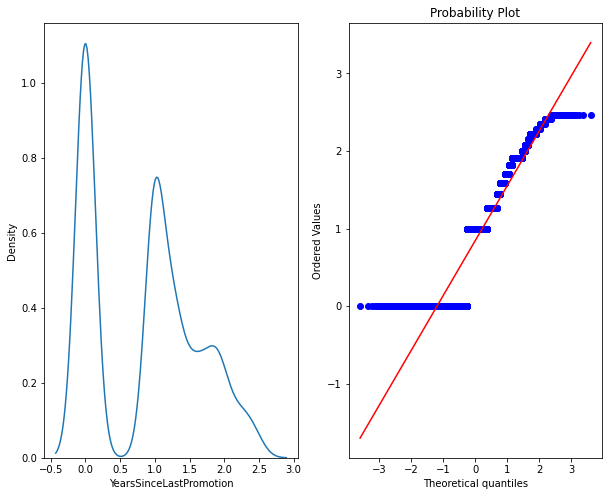

In [65]:
df['YearsSinceLastPromotion'] = np.cbrt(df['YearsSinceLastPromotion'])
#df['YearsSinceLastPromotion1'],parameters=stats.boxcox(df['YearsSinceLastPromotion']+1)
vNormalTest(df,'YearsSinceLastPromotion')

In [66]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled, columns=df.columns)


In [67]:
norm_df.describe()

,Age,Attrition,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,BusinessTravel_Non-Travel,Department_Sales,Department_Research & Development,Department_Human Resources,DistanceFromHome,Education,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays,Female
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.450567,0.161224,0.709524,0.188435,0.102041,0.303401,0.653741,0.042857,0.481209,0.478231,...,0.242537,0.576644,0.153741,0.574534,0.576082,0.587145,0.445212,0.342047,0.510162,0.400000
std,0.217460,0.367780,0.454034,0.391104,0.302736,0.459779,0.475831,0.202558,0.311500,0.255983,...,0.209843,0.237133,0.360742,0.363218,0.366251,0.234398,0.129580,0.261970,0.239278,0.489954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168391,0.250000,...,0.117647,0.333333,0.000000,0.333333,0.333333,0.333333,0.359127,0.139441,0.304348,0.000000
50%,0.428571,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.518584,0.500000,...,0.176471,0.666667,0.000000,0.666667,0.666667,0.666667,0.446429,0.284935,0.521739,0.000000
75%,0.595238,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.741122,0.750000,...,0.411765,0.666667,0.000000,1.000000,1.000000,0.666667,0.529762,0.471105,0.695652,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


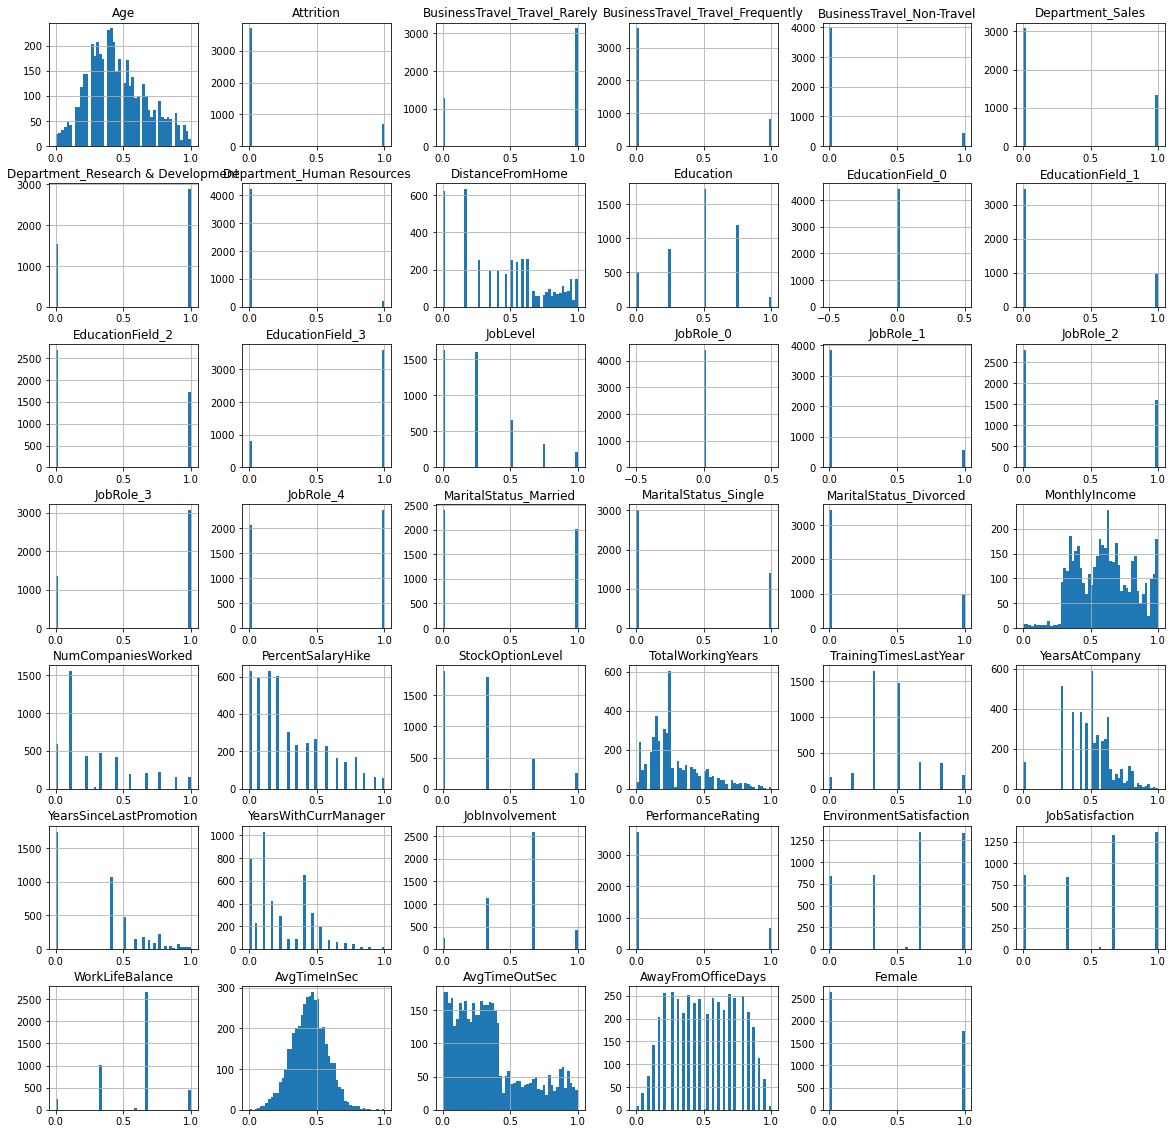

In [68]:
norm_df.hist(bins=50, figsize=(20,20))
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   BusinessTravel_Travel_Frequently   4410 non-null   float64
 4   BusinessTravel_Non-Travel          4410 non-null   float64
 5   Department_Sales                   4410 non-null   float64
 6   Department_Research & Development  4410 non-null   float64
 7   Department_Human Resources         4410 non-null   float64
 8   DistanceFromHome                   4410 non-null   float64
 9   Education                          4410 non-null   int64  
 10  EducationField_0                   4410 non-null   int64  
 11  EducationField_1                   4410 non-null   int64

Modelo de prediccion

In [124]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
seed = 121
X = norm_df.drop('Attrition', axis=1)
y = norm_df.Attrition
near = NearMiss(sampling_strategy="not minority")
X, y = near.fit_resample(X, y)


In [125]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
acc

0.765807962529274

In [128]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       217
         1.0       0.76      0.76      0.76       210

    accuracy                           0.77       427
   macro avg       0.77      0.77      0.77       427
weighted avg       0.77      0.77      0.77       427



In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[168,  49],
       [ 51, 159]], dtype=int64)

In [130]:
from imblearn.over_sampling import SMOTE
X = norm_df.drop('Attrition', axis=1)
y = norm_df.Attrition
sm = SMOTE(random_state = seed)
X, y = sm.fit_resample(X, y)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


In [131]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [132]:
acc = accuracy_score(pred, y_test)
acc

0.7108108108108108

In [133]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      1103
         1.0       0.70      0.73      0.72      1117

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220



In [134]:
confusion_matrix(y_test, pred)

array([[759, 344],
       [298, 819]], dtype=int64)